In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

import datetime
seed=2022


In [2]:
!pip install pickle5
import pickle5 as pickle
with open('all_streaks.pickle', "rb") as fh:
    streak_dictionary = pickle.load(fh)


<ipython-input-26-d342bdc15596>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


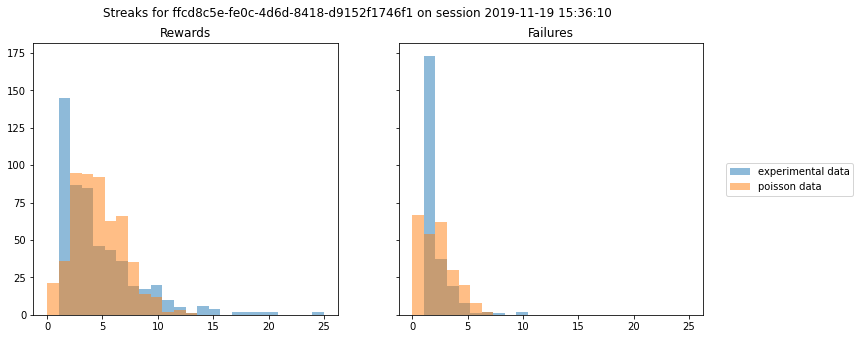

In [26]:
guy = 'ffcd8c5e-fe0c-4d6d-8418-d9152f1746f1'
session = datetime.datetime(2019, 11, 19, 15, 36, 10)
one_guy_one_session = streak_dictionary[guy][session]
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize= (12,5))
fig.suptitle('Streaks for {g} on session {s}'.format(g=guy,s=session))
poisson_vals_rew = np.random.poisson(np.mean(one_guy_one_session['rewards']),len(one_guy_one_session['rewards']))
poisson_vals_fail = np.random.poisson(-np.mean(one_guy_one_session['failures']),len(one_guy_one_session['failures']))

bins = np.linspace(0, 25, 25)

ax1.hist(one_guy_one_session['rewards'],bins, alpha=0.5, label='experimental data')
ax1.hist(poisson_vals_rew,bins, alpha=0.5, label='poisson data')
ax1.set_title('Rewards')
ax2.hist(-one_guy_one_session['failures'],bins, alpha=0.5, label='experimental data')
ax2.hist(poisson_vals_fail,bins, alpha=0.5, label='poisson data')
ax2.set_title('Failures')

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc="center right", bbox_to_anchor=(1.08,0.5))

fig.show()

<ipython-input-35-5b67692653fa>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


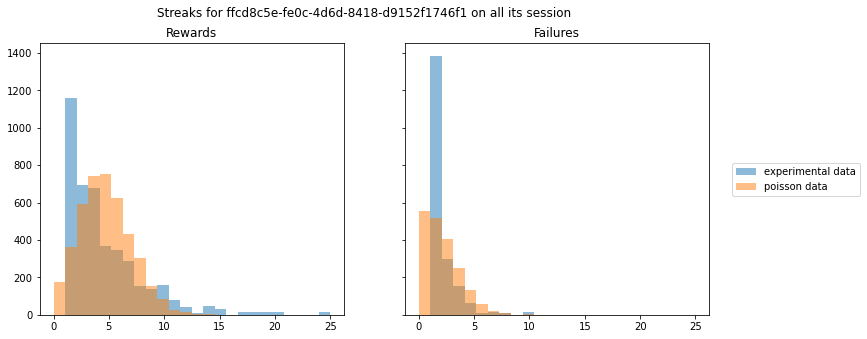

In [35]:
guy = 'ffcd8c5e-fe0c-4d6d-8418-d9152f1746f1'
session = datetime.datetime(2019, 11, 19, 15, 36, 10)
one_guy_all_sessions = streak_dictionary[guy]
all_rewards_session = [streak_dictionary[guy][session]['rewards'] for session in streak_dictionary[guy].keys()]
all_rewards_session = [item for sublist in all_rewards_session for item in sublist]

all_failures_session = [streak_dictionary[guy][session]['failures'] for session in streak_dictionary[guy].keys()]
all_failures_session = [item for sublist in all_failures_session for item in sublist]

poisson_vals_rew_session = np.random.poisson(np.mean(all_rewards_session),len(all_rewards_session))
poisson_vals_fail_session = np.random.poisson(-np.mean(all_failures_session),len(all_failures_session))

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize= (12,5))
fig.suptitle('Streaks for {g} on all its session'.format(g=guy))

bins = np.linspace(0, 25,25)

ax1.hist(all_rewards_session,bins, alpha=0.5, label='experimental data')
ax1.hist(poisson_vals_rew_session,bins, alpha=0.5, label='poisson data')
ax1.set_title('Rewards')
ax2.hist([-i for i in all_failures_session],bins, alpha=0.5, label='experimental data')
ax2.hist(poisson_vals_fail_session,bins, alpha=0.5, label='poisson data')
ax2.set_title('Failures')

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc="center right", bbox_to_anchor=(1.08,0.5))

fig.show()



<ipython-input-36-1eacb88644c9>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


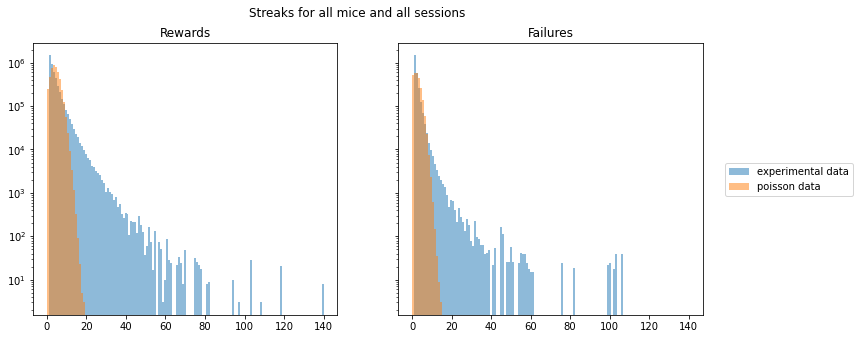

In [36]:
all_rewards_everybody = [streak_dictionary[guy][session]['rewards'] for guy in streak_dictionary.keys() for session in streak_dictionary[guy].keys() ]
all_rewards_everybody = [item for sublist in all_rewards_everybody for item in sublist]

all_failures_everybody = [streak_dictionary[guy][session]['failures'] for guy in streak_dictionary.keys() for session in streak_dictionary[guy].keys() ]
all_failures_everybody = [item for sublist in all_failures_everybody for item in sublist]

poisson_vals_rew_all = np.random.poisson(np.mean(all_rewards_everybody),len(all_rewards_everybody))
poisson_vals_fail_all = np.random.poisson(-np.mean(all_failures_everybody),len(all_failures_everybody))

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize= (12,5))
fig.suptitle('Streaks for all mice and all sessions')

bins = np.linspace(0, 140,140)

ax1.hist(all_rewards_everybody,bins, alpha=0.5, label='experimental data')
ax1.hist(poisson_vals_rew_all,bins, alpha=0.5, label='poisson data')
ax1.set_yscale('log')
ax1.set_title('Rewards')

ax2.hist([-i for i in all_failures_everybody],bins, alpha=0.5, label='experimental data')
ax2.hist(poisson_vals_fail_all,bins, alpha=0.5, label='poisson data')
ax2.set_yscale('log')
ax2.set_title('Failures')

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc="center right", bbox_to_anchor=(1.08,0.5))

fig.show()

In [45]:
from scipy.stats import mannwhitneyu

# The null hypothesis for this test is that the two groups have the same distribution,
# while the alternative hypothesis is that one group has larger (or smaller) values than the other.

# Different from the other tests we have seen so far, the Mann–Whitney U test is agnostic to outliers 
# and concentrates on the center of the distribution.


stat, p_value = mannwhitneyu(all_rewards_everybody, poisson_vals_rew_all)
print(f" Mann–Whitney U Test: statistic={stat:.4f}, p-value={p_value:.3E}")


stat, p_value = mannwhitneyu([-i for i in all_failures_everybody], poisson_vals_fail_all)
print(f" Mann–Whitney U Test: statistic={stat:.4f}, p-value={p_value:.3E}")

 Mann–Whitney U Test: statistic=8911768494635.0000, p-value=0.000E+00
 Mann–Whitney U Test: statistic=3198063928536.5000, p-value=0.000E+00
